In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import scipy
from scipy import stats
from scipy.stats import norm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stepwise_regression import step_reg
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('779414_project.csv')
data.head()

,Y,E1,E2,E3,E4,E5,E6,E7,E8,G1,...,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30
0,10.525167,7.854389,8.913405,6.565393,6.993341,9.292653,5.353894,5.140077,8.536922,0,...,1,1,1,1,1,0,1,0,0,0
1,13.415526,9.154240,9.843604,7.765238,7.403832,7.948206,7.361937,9.287343,7.048212,1,...,1,0,1,0,1,1,1,0,1,1
2,13.617077,6.482948,7.711028,7.804107,7.297177,5.665062,7.295711,9.542363,5.714542,0,...,1,1,1,1,0,1,0,0,0,0
3,9.776806,6.712727,9.601666,8.123204,7.883681,6.676015,6.949926,6.767072,8.551386,1,...,0,1,0,1,0,0,1,1,0,0
4,11.129903,7.065883,8.935642,5.711895,8.510285,6.712400,6.688294,6.821933,7.218909,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
#Box Cox trasformation for Normality 
fitted_data, fitted_lambda = stats.boxcox(data['Y'])
print('Lambda Value : ', round(fitted_lambda,2))

Lambda Value :  0.59


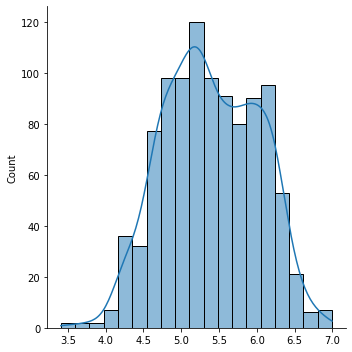

In [4]:
#Ploting Trasformed Y data 
import seaborn as sns
sns.displot(fitted_data, kde=True)

In [5]:
# Finding corrleation between Y variable and all X variable

corre = []
pval = []
col = []
for i in data:
    corr, pvalue = scipy.stats.pearsonr (data['Y'], data[i])
    col.append(i)
    corre.append(corr)
    pval.append(round(pvalue,4))
corr_pval = pd.DataFrame(
    {'Variables': col,
     'Correlation': corre,
     'Pvalue': pval
    })

In [6]:
#Selecting Variables with correlation P-vlaue less than 0.01
selected_Value =corr_pval[corr_pval.Pvalue < 0.01].Variables[1:]
selected_Value

1      E1
2      E2
6      E6
12     G4
23    G15
34    G26
Name: Variables, dtype: object

In [10]:
#Y and X Variables
x = data[selected_Value]
y = fitted_data
print('Dimensions of Y Variable :',y.shape) 
print('Dimensions of X Variables :',x.shape)

Dimensions of Y Variable : (1015,)
Dimensions of X Variables : (1015, 6)


In [17]:
lm=ols('y~E1+E2+E6', data=x).fit()
print(lm.summary())
table=sm.stats.anova_lm(lm)
print(table)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     49.54
Date:                Tue, 02 May 2023   Prob (F-statistic):           7.14e-30
Time:                        14:08:53   Log-Likelihood:                -887.54
No. Observations:                1015   AIC:                             1783.
Df Residuals:                    1011   BIC:                             1803.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4982      0.164     21.347      0.0

In [11]:
#Function to create combinations
from itertools import combinations_with_replacement

#Function to create 2 combinations
def f2(df):
    #with loop
    new_df = pd.DataFrame()
    for p in combinations_with_replacement(df.columns,2):
            title = p
            new_df[title] = df[p[0]]*df[p[1]]
    return new_df

#Function to create 3 combinations
def f3(df):
    #with loop
    new_df = pd.DataFrame()
    for p in combinations_with_replacement(df.columns,3):
            title = p
            new_df[title] = df[p[0]]*df[p[1]]*df[p[2]]
    return new_df

#Function to create 4 combinations
def f4(df):
    #with loop
    new_df = pd.DataFrame()
    for p in combinations_with_replacement(df.columns,4):
            new_df[p] = df[p[0]]*df[p[1]]*df[p[2]]*df[p[3]]
    return new_df


In [12]:
# 2 combinations with replacement
x_2 = f2(x)
print('Dimensions of 2 combinations for GE        :',x_2.shape)

# 3 combinations with replacement
x_3 = f3(x)
print('Dimensions of 3 combinations for GE        :',x_3.shape)

# 4 combinations with replacement
x_4 = f4(x)
print('Dimensions of 4 combinations foe GE        :',x_4.shape)

x_all = pd.concat([x,x_2,x_3,x_4], axis=1)
print('Dimensions of all combinations added for GE:',x_all.shape)

Dimensions of 2 combinations for GE        : (1015, 21)
Dimensions of 3 combinations for GE        : (1015, 56)
Dimensions of 4 combinations foe GE        : (1015, 126)
Dimensions of all combinations added for GE: (1015, 209)


In [13]:
# Selecting the important independent variables using Stepwise Backward regression
backselect = step_reg.backward_regression(x_all, y, 0.01,verbose=False)
backselect

['G26',
 ('E2', 'G26'),
 ('E6', 'G4'),
 ('G26', 'G26'),
 ('E1', 'E1', 'E2'),
 ('E1', 'E6', 'G15'),
 ('E2', 'E2', 'E6'),
 ('E2', 'E2', 'G26'),
 ('E2', 'E6', 'E6'),
 ('E2', 'G26', 'G26'),
 ('E6', 'E6', 'G4'),
 ('E6', 'G4', 'G4'),
 ('G26', 'G26', 'G26'),
 ('E1', 'E1', 'E2', 'E6'),
 ('E1', 'E2', 'E2', 'G4'),
 ('E1', 'E2', 'E6', 'E6'),
 ('E1', 'E6', 'G15', 'G15'),
 ('E2', 'E2', 'E2', 'E6'),
 ('E2', 'E2', 'E2', 'G26'),
 ('E2', 'E2', 'G26', 'G26'),
 ('E2', 'G26', 'G26', 'G26'),
 ('E6', 'E6', 'G4', 'G4'),
 ('E6', 'G4', 'G4', 'G4'),
 ('G26', 'G26', 'G26', 'G26')]

<AxesSubplot:>

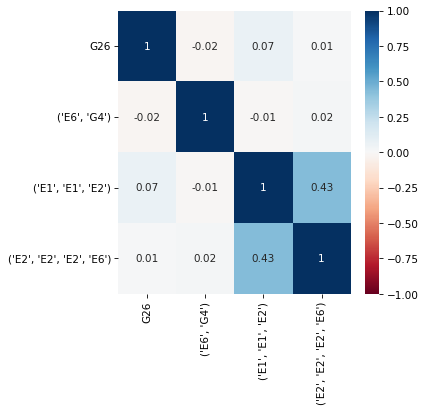

In [14]:
#Droping most correlated Variables
x_selected = x_all[backselect]
x_selected.drop(x_selected.columns[[1,3,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23]], axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(5, 5),dpi=75)
corr = round(x_selected.corr(),2)
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [15]:
# Frist 5 rows of selected independent variables
x_selected.head()

,G26,"(E6, G4)","(E1, E1, E2)","(E2, E2, E2, E6)"
0,0,0.000000,549.880720,3791.409942
1,1,7.361937,824.895055,7021.898765
2,1,7.295711,324.083860,3345.064599
3,0,0.000000,432.657807,6152.052244
4,0,0.000000,446.127128,4771.913824


In [16]:
X = pd.DataFrame({'G26': x_selected.iloc[:,0], 'E6_G4': x_selected.iloc[:,1],
                   'E1_E1_E2': x_selected.iloc[:,2],'E2_E2_E2_E6': x_selected.iloc[:,3]})

In [14]:
from statsmodels.formula.api import ols
lm=ols('y~G26+E6_G4+E1_E1_E2+E2_E2_E2_E6', data=X).fit()
print(lm.summary())
table=sm.stats.anova_lm(lm)
print(table)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     844.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          3.18e-320
Time:                        14:13:15   Log-Likelihood:                -211.84
No. Observations:                1015   AIC:                             433.7
Df Residuals:                    1010   BIC:                             458.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4513      0.027    167.776      

In [15]:
#Predicting Dependent Variable Y
y_pred = lm.predict(X)

#Transforming predicted dependent Variable Y
if fitted_lambda == 0:
    y_pred_trans = np.exp(y_pred)
else:
    y_pred_trans = (y_pred * fitted_lambda + 1) ** (1 / fitted_lambda)

Mean Squared Error: 0.62


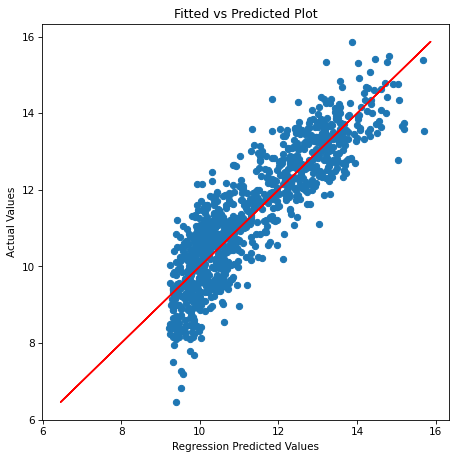

In [16]:
#Plot fitted vs Actual values 
print('Mean Squared Error:', round(mean_squared_error(data['Y'], y_pred_trans),3))
fig, ax = plt.subplots(figsize=(7, 7),dpi=75)
plt.scatter(y_pred_trans, data['Y'])
plt.plot(data['Y'], data['Y'], color='red')
plt.xlabel('Regression Predicted Values')
plt.ylabel('Actual Values')
plt.title('Fitted vs Predicted Plot')
plt.savefig('plot_1.png')
plt.show()


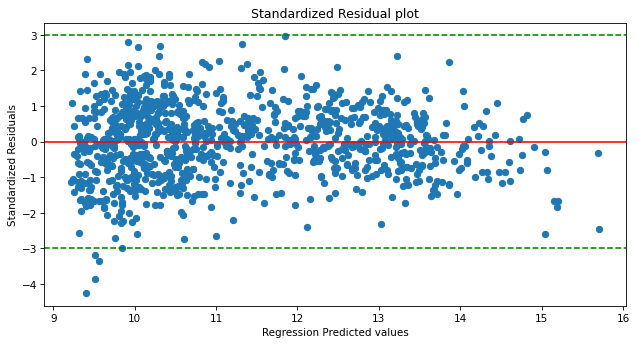

In [17]:
#Cal Standardized Residuals
std_resid = lm.get_influence().resid_studentized_internal

fig, ax = plt.subplots(figsize=(10, 5),dpi=75)

plt.scatter(y_pred_trans, std_resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=3, color='g', linestyle='--')
plt.axhline(y=-3, color='g', linestyle='--')
plt.xlabel('Regression Predicted values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residual plot')
plt.savefig('plot_2.png')
plt.show()


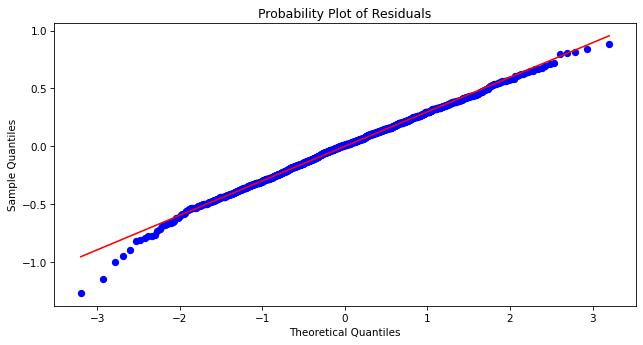

In [18]:
residuals = lm.resid
# create the probability plot
fig, ax = plt.subplots(figsize=(10, 5),dpi=75)
stats.probplot(residuals, plot=ax, fit=True)

# customize the plot
ax.set_title('Probability Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()